In [44]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [164]:
img = cv.imread('seg_words/img_79.png')

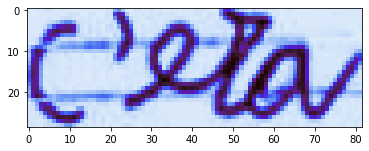

In [165]:
plt.imshow(img, cmap='gray')

In [166]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th, letterGray = cv.threshold(gray, 170, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
# normalize image pixel in range [0,1]

letterGray = letterGray/255

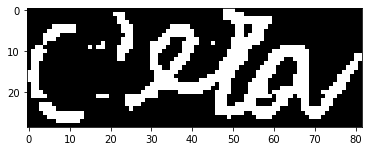

In [167]:
plt.imshow(letterGray, cmap='gray')

In [168]:
from skimage import io, color, morphology

letterGray = morphology.thin(letterGray)

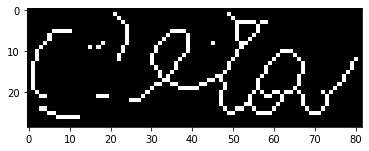

In [169]:
plt.imshow(letterGray, cmap='gray')

In [170]:
letterGray.shape

(29, 82)

In [171]:
h = letterGray.shape[0]
w = letterGray.shape[1]

In [172]:
# sum each column pixel 
col = np.sum(letterGray==True,axis=0)

In [173]:
col

array([0, 7, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1,
       3, 3, 5, 1, 1, 1, 1, 1, 4, 4, 4, 2, 3, 3, 4, 3, 3, 6, 1, 1, 1, 1,
       1, 2, 1, 6, 4, 4, 3, 8, 4, 3, 5, 4, 6, 4, 5, 3, 3, 3, 3, 2, 2, 2,
       5, 6, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 0])

In [174]:
csc = np.where(col<=1)

In [175]:
csc = csc[0]

In [176]:
csc

array([ 0, 11, 12, 13, 14, 15, 16, 19, 20, 21, 25, 26, 27, 28, 29, 40, 41,
       42, 43, 44, 46, 68, 69, 70, 71, 74, 75, 76, 78, 80, 81])

In [177]:
sp = []
s = 0
n = 0
flag = False
# compute average between closed black columns
for i in range(len(csc)-1):

    if(csc[i+1]-csc[i] <= 5):

        s += csc[i]
        n += 1

        if(i == len(csc)-2):
            flag = True
            s += csc[i+1]
            n += 1
            sp.append(s//n)
    else:
        if(n>0):
            sp.append(s//n)
            n = 0
            s = 0
        else:
            sp.append(csc[i])
        
if not flag and sp!=[]:
    sp.append(csc[-1])
         

In [178]:
sp

[0, 19, 42, 74]

In [179]:
for i in sp:
        
    cv.rectangle(img, (i,0), (i,h), (255,255,0))

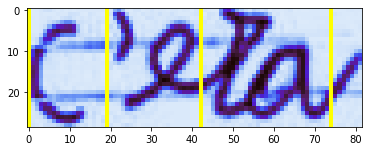

In [180]:
plt.imshow(img, cmap='gray')